**1. Importing the dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and Understanding**

In [3]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.shape

(7043, 21)

In [5]:
columns_1 = ["customerID", "gender", "SeniorCitizen", "Partner", "Dependents",
             "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity","OnlineBackup",]
df[columns_1].head(5)
df[columns_1].head(5).style.hide(axis="index").background_gradient(cmap="Blues")


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No


In [6]:
columns_2 = [ "DeviceProtection", "TechSupport", "StreamingTV",
             "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",
             "MonthlyCharges", "TotalCharges", "Churn"]
df[columns_2].head(5)
df[columns_2].head(5).style.hide(axis="index").background_gradient(cmap="Greens")

DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
Yes,No,No,No,One year,No,Mailed check,56.950000,1889.5,No
No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
No,No,No,No,Month-to-month,Yes,Electronic check,70.700000,151.65,Yes


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
pd.set_option("display.max_columns", None) # just to show the every colum if it was truncated early

In [9]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [12]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
print(df["gender"].unique())

['Female' 'Male']


In [15]:
print(df["SeniorCitizen"].unique())

[0 1]


In [16]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [17]:
print(df.isnull().sum()) ## checking which colums has missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [19]:
df[df["TotalCharges"]==" "] # some values are missing in the total charges 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
len(df[df["TotalCharges"]==" "])

11

In [21]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"}) # replace the total charges with the float value 0.0

In [22]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [25]:
df.shape

(7043, 20)

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [29]:
def plot_histogram(df, column_name, save_path=None):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

    # calculate the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()

    # save the plot if save_path is given
    if save_path:
        plt.savefig(save_path, dpi=500, bbox_inches='tight')  # high quality
        print(f"✅ Saved histogram for {column_name} at {save_path}")

    plt.show()


In [30]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

In [31]:
plot_histogram(df, "tenure",save_path="tenure.png")

TypeError: plot_histogram() got an unexpected keyword argument 'save_path'

In [ ]:
plot_histogram(df, "MonthlyCharges",save_path="MonthlyCharges.png")

In [ ]:
plot_histogram(df, "TotalCharges",save_path="TotalCharges.png")

**Box plot for numerical features**

In [ ]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

In [ ]:
plot_boxplot(df, "tenure")

In [ ]:
plot_boxplot(df, "MonthlyCharges")

In [ ]:
plot_boxplot(df, "TotalCharges")

In [ ]:
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['TotalCharges'] < lower_bound) | (df['TotalCharges'] > upper_bound)]
print("Outliers:", outliers)
print("Lower whisker:", df[df['TotalCharges'] >= lower_bound]['TotalCharges'].min())
print("Upper whisker:", df[df['TotalCharges'] <= upper_bound]['TotalCharges'].max())


**Correlation Heatmap for numerical columns**

In [ ]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=500, bbox_inches='tight')
plt.show()

Categorical features - Analysis

In [ ]:
df.columns

In [ ]:
df.info()

Countplot for categorical columns

In [ ]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

✅ Saved countplot_Contract.png


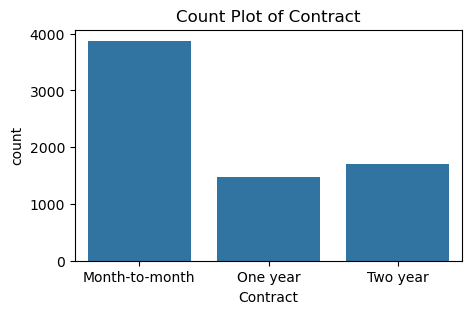

✅ Saved countplot_PaymentMethod.png


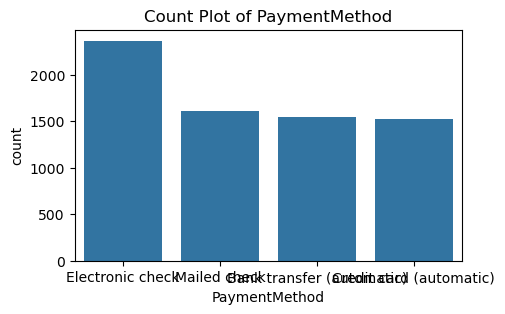

✅ Saved countplot_InternetService.png


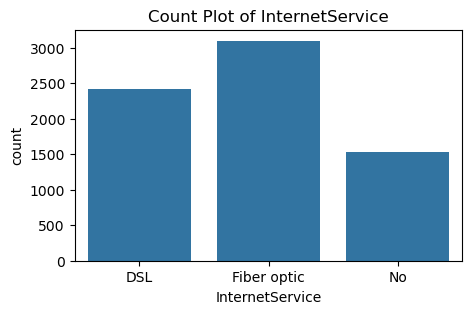

✅ Saved countplot_SeniorCitizen.png


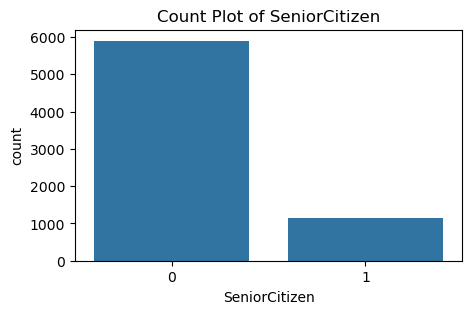

✅ Saved countplot_Churn.png


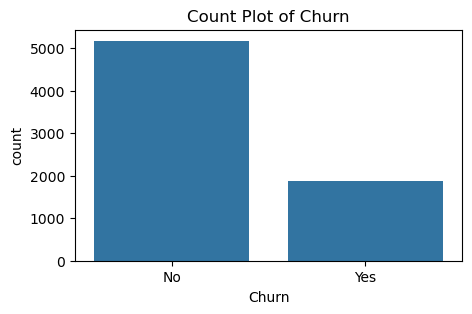

In [32]:
object_cols = ["SeniorCitizen", "gender", "Partner", "Dependents", 
               "PhoneService", "MultipleLines", "InternetService", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies", 
               "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

# List of columns to save for PPT
save_cols = ["Contract", "PaymentMethod", "InternetService", "SeniorCitizen", "Churn"]

for col in save_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    
    # Save high-quality image
    plt.savefig(f"countplot_{col}.png", dpi=300, bbox_inches='tight')
    print(f"✅ Saved countplot_{col}.png")
    
    plt.show()


**4. Data Preprocessing**

In [33]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [34]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/var/folders/b1/9hvn6jfj541c8lsldfbmbm_r0000gn/T/ipykernel_7987/2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [35]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [36]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label encoding of categorical fetaures

In [37]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [38]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [39]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [40]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Traianing and test data split**

In [42]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [43]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(y_train.shape)

(5634,)


In [45]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [46]:
smote = SMOTE(random_state=42)

In [47]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:
print(y_train_smote.shape)

(8276,)


In [49]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [50]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [51]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [52]:
cv_scores

{'Decision Tree': array([0.68055556, 0.71903323, 0.81752266, 0.84350453, 0.84048338]),
 'Random Forest': array([0.72826087, 0.77220544, 0.90453172, 0.89305136, 0.90030211]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [53]:
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ============================
# 1. Initialize Models
# ============================
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# ============================
# 2. Define Hyperparameter Grids
# ============================
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

# ============================
# 3. Perform RandomizedSearchCV (5-Fold CV)
# ============================
random_search_dt = RandomizedSearchCV(
    estimator=decision_tree,
    param_distributions=param_grid_dt,
    n_iter=20, cv=5, scoring="accuracy", random_state=42, n_jobs=-1
)

random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_grid_rf,
    n_iter=20, cv=5, scoring="accuracy", random_state=42, n_jobs=-1
)

random_search_xgb = RandomizedSearchCV(
    estimator=xgboost_classifier,
    param_distributions=param_grid_xgb,
    n_iter=20, cv=5, scoring="accuracy", random_state=42, n_jobs=-1
)

print("Training Decision Tree...")
random_search_dt.fit(X_train_smote, y_train_smote)

print("Training Random Forest...")
random_search_rf.fit(X_train_smote, y_train_smote)

print("Training XGBoost...")
random_search_xgb.fit(X_train_smote, y_train_smote)






Training Decision Tree...
Training Random Forest...
Training XGBoost...


/Users/subhampan/miniforge3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/subhampan/miniforge3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/subhampan/miniforge3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/subhampan/miniforge3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:20:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encode

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.5, 0.7, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...], ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [54]:
# 4. Select Best Model

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

print(f"✅ Best Model: {best_model}")
print(f"✅ Best Cross-Validation Accuracy: {best_score:.2f}")

✅ Best Model: RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)
✅ Best Cross-Validation Accuracy: 0.84


In [55]:
#save the best model 


with open("best_churn_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Best model saved as best_churn_model.pkl")


✅ Best model saved as best_churn_model.pkl


In [56]:
#load the saved model


with open("best_churn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("✅ Best model loaded successfully")


✅ Best model loaded successfully


**6. Model Evaluation**

🔍 Accuracy: 0.7806955287437899

📊 Confusion Matrix (raw values):
 [[873 163]
 [146 227]]

📑 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



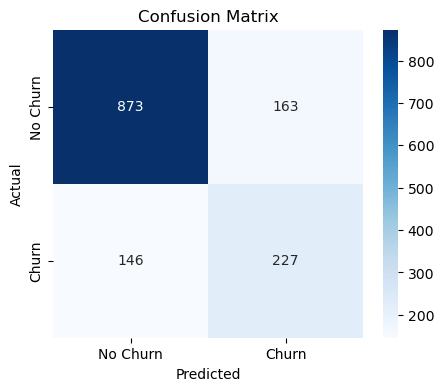

[9.62513988e-01 1.58059579e-01 2.71192529e-04 ... 2.00645163e-02
 1.53333333e-02 4.33316281e-01]


In [57]:
# evaluate on test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve


# Predictions on test set
y_pred = loaded_model.predict(X_test)
y_proba = loaded_model.predict_proba(X_test)[:, 1]  # probability of churn=1

# ------------------ Basic Evaluation ------------------
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix (raw values):\n", confusion_matrix(y_test, y_pred))
print("\n📑 Classification Report:\n", classification_report(y_test, y_pred))

# ------------------ Confusion Matrix Heatmap ------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('confusion_matrix_smote.png', dpi=500, bbox_inches='tight')
plt.title("Confusion Matrix")
plt.show()
print(y_proba)


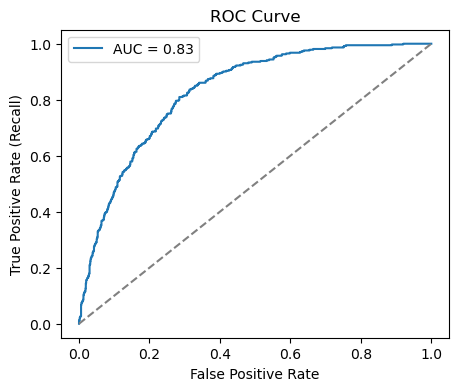

In [58]:
# ------------------ ROC Curve ------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

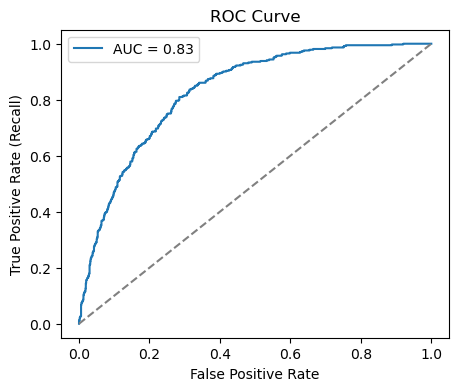

In [59]:
# ------------------ ROC Curve ------------------
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

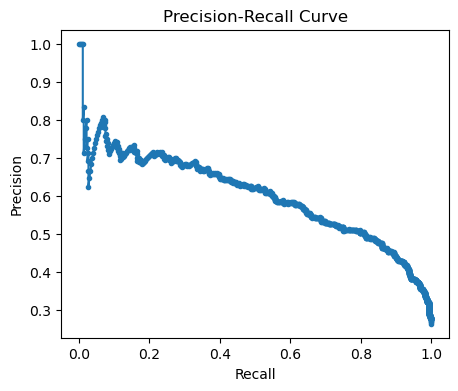

In [60]:
 #------------------ Precision-Recall Curve ------------------
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**7. Load the saved  model and  build a Predictive System**

In [61]:
# load teh saved model and the feature names
with open("best_churn_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

NameError: name 'model_data' is not defined

In [ ]:
print(loaded_model)

In [ ]:
print(feature_names)

In [ ]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

In [ ]:
encoders

**To do:**
1. Implement Hyperparameter Tuining
2. Try Model Selection
3. Try downsampling
4. Try to address teh overfitting
5. Try Startified k fold CV

In [62]:
import random

# ------------------ 1. Generate synthetic test data (100 rows) ------------------
gender = ['Male', 'Female']
partner = ['Yes', 'No']
dependents = ['Yes', 'No']
phoneservice = ['Yes', 'No']
multiplelines = ['Yes', 'No', 'No phone service']
internetservice = ['DSL', 'Fiber optic', 'No']
onlinesecurity = ['Yes', 'No', 'No internet service']
onlinebackup = ['Yes', 'No', 'No internet service']
deviceprotection = ['Yes', 'No', 'No internet service']
techsupport = ['Yes', 'No', 'No internet service']
streamingtv = ['Yes', 'No', 'No internet service']
streamingmovies = ['Yes', 'No', 'No internet service']
contract = ['Month-to-month', 'One year', 'Two year']
paperlessbilling = ['Yes', 'No']
paymentmethod = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

data = []
for _ in range(100):
    tenure = random.randint(0, 72)
    monthly = round(random.uniform(20, 120), 2)
    total = round(monthly * tenure + random.uniform(0, 50), 2)
    data.append({
        'gender': random.choice(gender),
        'SeniorCitizen': random.randint(0,1),
        'Partner': random.choice(partner),
        'Dependents': random.choice(dependents),
        'tenure': tenure,
        'PhoneService': random.choice(phoneservice),
        'MultipleLines': random.choice(multiplelines),
        'InternetService': random.choice(internetservice),
        'OnlineSecurity': random.choice(onlinesecurity),
        'OnlineBackup': random.choice(onlinebackup),
        'DeviceProtection': random.choice(deviceprotection),
        'TechSupport': random.choice(techsupport),
        'StreamingTV': random.choice(streamingtv),
        'StreamingMovies': random.choice(streamingmovies),
        'Contract': random.choice(contract),
        'PaperlessBilling': random.choice(paperlessbilling),
        'PaymentMethod': random.choice(paymentmethod),
        'MonthlyCharges': monthly,
        'TotalCharges': total
    })

test_df = pd.DataFrame(data)
test_df.to_csv("synthetic_test_customers_no_churn.csv", index=False)
print("✅ Synthetic test CSV without Churn saved as 'synthetic_test_customers_no_churn.csv'")



✅ Synthetic test CSV without Churn saved as 'synthetic_test_customers_no_churn.csv'


In [63]:
# ------------------ 1. Imports ------------------
import pandas as pd
import pickle

# ------------------ 2. Load saved model and encoders ------------------
with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# ------------------ 3. Load new/unlabeled test dataset ------------------
test_data = pd.read_csv("synthetic_test_customers.csv")  # 100-row synthetic CSV

# Select only the features used in the model
X_test = test_data[feature_names]

# ------------------ 4. Encode categorical features ------------------
for column, encoder in encoders.items():
    X_test[column] = encoder.transform(X_test[column])

# ------------------ 5. Make predictions ------------------
y_pred = loaded_model.predict(X_test)          # 0 = No Churn, 1 = Churn
y_prob = loaded_model.predict_proba(X_test)[:, 1]  # probability of churn

# ------------------ 6. Prepare results table ------------------
results_df = X_test.copy()
results_df["Predicted Churn"] = y_pred
results_df["Predicted Probability"] = y_prob

# Optional: make it prettier
results_df["Predicted Churn"] = results_df["Predicted Churn"].map({0: "No Churn", 1: "Churn"})
results_df = results_df.round(2)  # round numeric columns for better display

# ------------------ 7. Display top 10 predictions ------------------
print("✅ Prediction results (first 10 rows):")
display(results_df.head(10))
# Loop over first 10 predictions for demonstration
for i in range(10):
    pred_label = "Churn" if y_pred[i] == 1 else "No Churn"
    pred_prob = y_prob[i]
    print(f"Customer {i+1}: Prediction = {pred_label}, Probability = {pred_prob:.2f}")
print("All predictions:", y_pred)



# ------------------ 8. Save results to CSV if needed ------------------
results_df.to_csv("predicted_churn_results.csv", index=False)
print("✅ Predictions saved to 'predicted_churn_results.csv'")


✅ Prediction results (first 10 rows):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predicted Churn,Predicted Probability
0,0,1,1,1,0,0,0,1,1,2,1,2,2,2,0,0,2,49.12,49.32,No Churn,0.50
1,0,0,1,0,46,0,1,2,1,1,0,2,1,1,0,0,2,57.45,2676.99,No Churn,0.43
2,1,0,1,1,66,0,0,0,1,1,0,1,1,1,1,0,2,110.85,7339.57,Churn,0.64
3,0,0,1,1,50,1,0,0,1,2,2,0,1,1,2,1,1,84.49,4264.98,No Churn,0.26
4,1,1,0,0,52,0,1,1,1,0,0,0,2,0,2,1,3,51.33,2670.03,No Churn,0.36
5,0,1,0,1,16,1,1,1,1,0,0,2,1,2,2,0,3,95.65,1547.08,No Churn,0.35
6,1,0,1,1,0,0,1,0,0,1,1,1,2,0,1,0,2,115.92,45.19,Churn,0.56
7,1,0,0,0,61,1,2,2,2,2,0,0,1,1,1,1,0,109.13,6690.22,No Churn,0.42
8,1,1,1,0,27,1,0,0,2,1,0,2,2,2,0,0,3,35.33,962.21,No Churn,0.41
9,1,0,0,0,34,1,1,0,1,1,1,0,1,0,1,1,1,101.97,3488.01,Churn,0.66


Customer 1: Prediction = No Churn, Probability = 0.50
Customer 2: Prediction = No Churn, Probability = 0.43
Customer 3: Prediction = Churn, Probability = 0.64
Customer 4: Prediction = No Churn, Probability = 0.26
Customer 5: Prediction = No Churn, Probability = 0.36
Customer 6: Prediction = No Churn, Probability = 0.35
Customer 7: Prediction = Churn, Probability = 0.56
Customer 8: Prediction = No Churn, Probability = 0.42
Customer 9: Prediction = No Churn, Probability = 0.41
Customer 10: Prediction = Churn, Probability = 0.66
All predictions: [0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0]
✅ Predictions saved to 'predicted_churn_results.csv'


In [ ]:
import gradio as gr

def predict_churn(**kwargs):
    input_df = pd.DataFrame([kwargs])
    for col, enc in encoders.items():
        input_df[col] = enc.transform(input_df[col])
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0,1]
    return {"Prediction": "Churn" if pred==1 else "No Churn", "Probability": round(prob,2)}

inputs = {col: gr.Dropdown(choices=list(encoders[col].classes_), label=col) if col in encoders else gr.Number(label=col)
          for col in features}

gr.Interface(fn=predict_churn, inputs=inputs, outputs=["text", "text"]).launch()
